# Chapter 6: Confidence Intervals

### Section 6.1: Confidence Intervals for the Mean ($\sigma$ Known)

##### Objective 1: Finding a Point Estimate and the Margin of Error

##### Definition:

A <em><b>point estimate</b></em> is a single value estimate for a populatin parameter.

The most unbiased point estimate of the population mean, $\mu$, is the sample mean $\bar{x}$.

By unbiased we mean the estimate doesn't overestimate or underestimate the population parameter.

##### Example:

An economics researcher is collecting data about grocery store employees in a county. The data listed below represents a random sample of the number of hours worked by 40 employees from several grocery stores in the county. Find a point estimate of the population mean $\mu$.

<table>
    <tr> <td>30</td> <td>26</td> <td>33</td> <td>26</td> <td>26</td> <td>33</td> <td>31</td> <td>31</td> <td>21</td> <td>37</td> </tr>
    <tr> <td>27</td> <td>20</td> <td>34</td> <td>35</td> <td>30</td> <td>24</td> <td>38</td> <td>34</td> <td>39</td> <td>31</td> </tr>
    <tr> <td>22</td> <td>30</td> <td>23</td> <td>23</td> <td>31</td> <td>44</td> <td>31</td> <td>33</td> <td>33</td> <td>26</td> </tr>
    <tr> <td>27</td> <td>28</td> <td>25</td> <td>35</td> <td>23</td> <td>32</td> <td>29</td> <td>31</td> <td>25</td> <td>27</td> </tr>
</tabl>

##### Solution:

Since the most unbiased point estimate is the sample mean, $\bar{x}$, we need only calculatre it.

$\boxed{\bar{x} = 29.6}$

##### Interval Estimates

* The probability that the population mean is <em>exactly</em> the point estimate calculated is nearly zero

* Although the probability of the point estimate is nearly zero, there is a high probability that $\mu$ is <em>close</em> to the point estimate.

* Instead of estimating $\mu$ to be this exact point estimate we can use an interval about this point estimate which has a high probability of including $\mu$.

##### Definition:

An <em><b>interval estimate</b></em> is an interval, or range of values, used to estimate a population parameter.

In a picture:

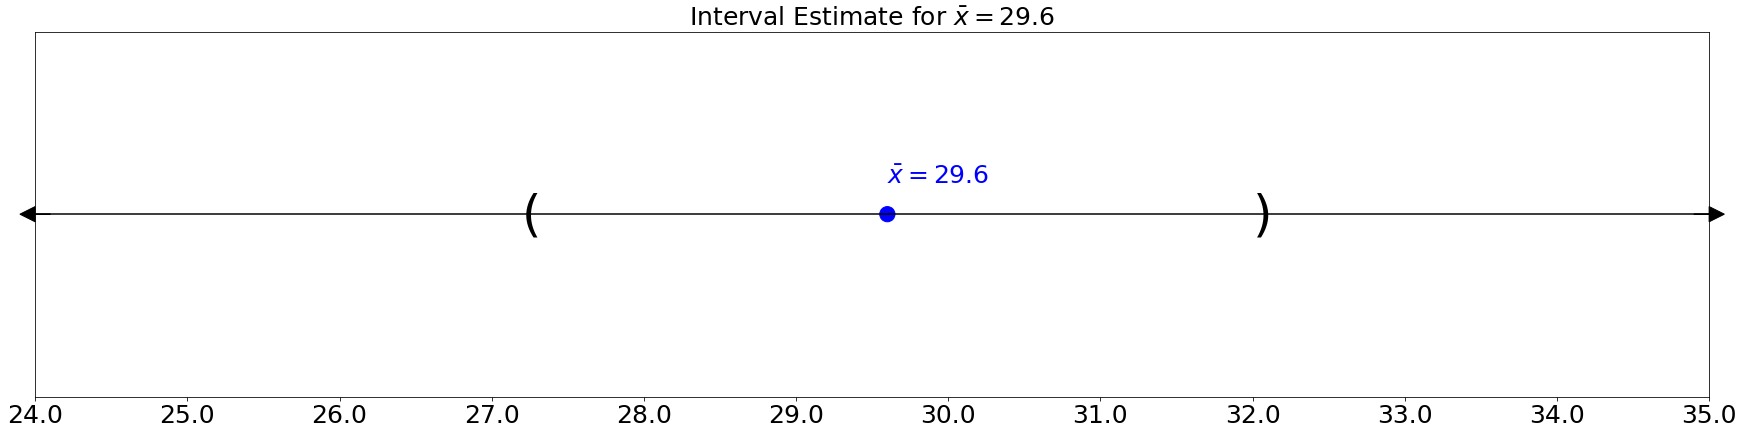

In [269]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

%matplotlib inline

xbar = 29.6
E = 2.4
xmin = xbar - 2*E
xmax = xbar + 2*E

fig, ax = plt.subplots(figsize=(30,15))
ax.axhline(y=0, color='k')
ax.set(xlim=(xmin,xmax),ylim=(-.5*E,.5*E))
ax.arrow(np.floor(xmin)+.1,0,-.1,0, width=0.001,color='k',clip_on=False, head_width=0.1, head_length=0.1)
ax.arrow(np.ceil(xmax)-.1,0,.1,0, width=0.001,color='k',clip_on=False, head_width=0.1, head_length=0.1)
ax.set_yticks([])
ax.set_xticks(np.arange(np.floor(xmin),np.ceil(xmax)+1,1))
ax.tick_params(labelsize=25)
ax.text(xbar,.2,r'$\bar{x}=$' + '${}$'.format(xbar),fontsize=25,color='blue')
point = plt.Circle(xy=(xbar,0),radius=.05,color='blue')
ax.text(xbar - E,-0.1,'(',fontsize=50)
ax.text(xbar + E,-0.1,')',fontsize=50)
ax.add_artist(point)
ax.set_aspect(aspect='equal')
ax.set_title(r'Interval Estimate for $\bar{x} = $' + '${}$'.format(xbar),fontsize=25)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))

##### Definitions:

The <em><b>level of confidence</b></em>, $c$, is the probability that the interval estimate contains the population parameter, assuming that the estimation process is repeated a large number of times.

The level of confidence, $c$, is the area under the standard normal curve between the <em><b>critical values</b></em>, $-z_c$ and $z_c$.

Critical values are values that separate sample statistics that are probable from sample statistics that are improbable, or unusual.

In a picture:

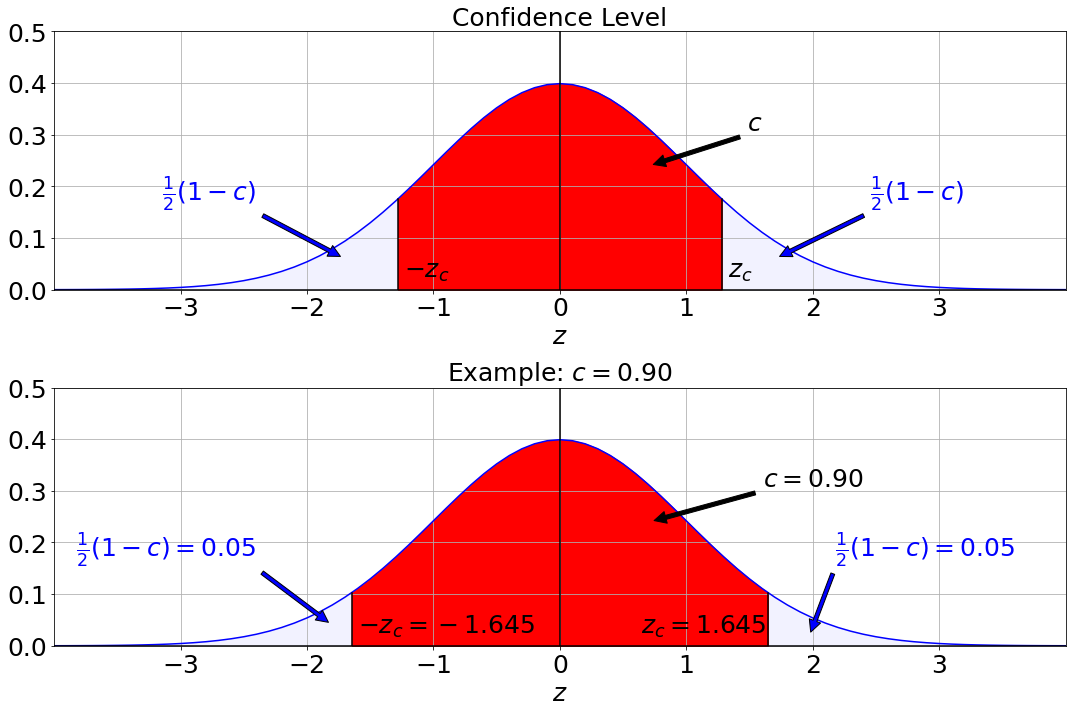

In [271]:
import scipy.stats as stats

sigma = 1
mu = 0

x = np.arange(mu-4*sigma,mu+4*sigma+.1,.1)
y = stats.norm.pdf(x,mu,sigma)

z1 = -1.28
z2 = 1.28

x_fill_left = np.linspace(-10,z1,1000)
x_fill_right = np.linspace(z2,10,1000)
y_fill_left = stats.norm.pdf(x_fill_left,mu,sigma)
y_fill_right = stats.norm.pdf(x_fill_right,mu,sigma)

x_fill_between = np.linspace(z1,z2,1000)
y_fill_between = stats.norm.pdf(x_fill_between,mu,sigma)

fig, (ax1, ax2) = plt.subplots(2,figsize=(15,10))
ax1.plot(x, y,color='blue')
ax1.grid(True, which='both')
ax1.axhline(y=0, color='k')
ax1.axvline(x=0, color='k')
ax1.fill_between(x,0,y,color='blue',alpha=.05)
ax1.fill_between(x_fill_between,0,y_fill_between,color='red') ##### AREA BETWEEN
ax1.set_title('Confidence Level',fontsize=25)
ax1.set_xticks(np.arange(mu-3*sigma,mu+3*sigma+1,sigma))
ax1.set_yticks(np.arange(0,1.1,.1))
ax1.set(xlim=(-4,4),ylim=(0,.5))
ax1.set_xlabel('$z$',fontsize=25)
ax1.axvline(x=z1,ymin=0,ymax=2*stats.norm.pdf(z1,mu,sigma),color='k') ##### ANNOTATE LEFT
ax1.annotate('$-z_c$',xy=(z1+.05,0.025),xytext=(z1+0.05,0.025),color='k',fontsize=25)
ax1.axvline(x=z2,ymin=0,ymax=2*stats.norm.pdf(z2,mu,sigma),color='k') ##### ANNOTATE RIGHT
ax1.annotate('$z_c$',xy=(z2+.05,0.025),xytext=(z2+0.05,0.025),color='k',fontsize=25)
ax1.annotate('$c$',
            xy=(mu+.7*sigma, stats.norm.pdf(mu,mu,sigma)-.4*stats.norm.pdf(mu,mu,sigma)),
            xytext=(.7, 0.6),
            textcoords='axes fraction',
            arrowprops=dict(facecolor='k', shrink=0.05),
            horizontalalignment='right',
            verticalalignment='bottom',
            color='k',
           fontsize=25)
ax1.annotate(r'$\frac{1}{2}(1-c)$',
            xy=(mu-1.7*sigma, stats.norm.pdf(mu,mu,sigma)-.85*stats.norm.pdf(mu,mu,sigma)),
            xytext=(.2, 0.3),
            textcoords='axes fraction',
            arrowprops=dict(facecolor='blue', shrink=0.05),
            horizontalalignment='right',
            verticalalignment='bottom',
            color='blue',
           fontsize=25)
ax1.annotate(r'$\frac{1}{2}(1-c)$',
            xy=(mu+1.7*sigma, stats.norm.pdf(mu,mu,sigma)-.85*stats.norm.pdf(mu,mu,sigma)),
            xytext=(.9, 0.3),
            textcoords='axes fraction',
            arrowprops=dict(facecolor='blue', shrink=0.05),
            horizontalalignment='right',
            verticalalignment='bottom',
            color='blue',
           fontsize=25)
ax1.tick_params(labelsize=25)

z1 = -1.645
z2=1.645

x_fill_between = np.linspace(z1,z2,1000)
y_fill_between = stats.norm.pdf(x_fill_between,mu,sigma)

ax2.plot(x, y,color='blue')
ax2.grid(True, which='both')
ax2.axhline(y=0, color='k')
ax2.axvline(x=0, color='k')
ax2.fill_between(x,0,y,color='blue',alpha=.05)
ax2.fill_between(x_fill_between,0,y_fill_between,color='red') ##### AREA BETWEEN
ax2.set_title('Example: $c=0.90$',fontsize=25)
ax2.set_xticks(np.arange(mu-3*sigma,mu+3*sigma+1,sigma))
ax2.set_yticks(np.arange(0,1.1,.1))
ax2.set(xlim=(-4,4),ylim=(0,.5))
ax2.set_xlabel('$z$',fontsize=25)
ax2.axvline(x=z1,ymin=0,ymax=2*stats.norm.pdf(z1,mu,sigma),color='k') ##### ANNOTATE LEFT
ax2.annotate('$-z_c = -1.645$',xy=(z1+.05,0.025),xytext=(z1+0.05,0.025),color='k',fontsize=25)
ax2.axvline(x=z2,ymin=0,ymax=2*stats.norm.pdf(z2,mu,sigma),color='k') ##### ANNOTATE RIGHT
ax2.annotate('$z_c=1.645$',xy=(z2+.05,0.025),xytext=(z2-1,0.025),color='k',fontsize=25)
ax2.annotate('$c=0.90$',
            xy=(mu+.7*sigma, stats.norm.pdf(mu,mu,sigma)-.4*stats.norm.pdf(mu,mu,sigma)),
            xytext=(.8, 0.6),
            textcoords='axes fraction',
            arrowprops=dict(facecolor='k', shrink=0.05),
            horizontalalignment='right',
            verticalalignment='bottom',
            color='k',
           fontsize=25)
ax2.annotate(r'$\frac{1}{2}(1-c) = 0.05$',
            xy=(mu-1.8*sigma, stats.norm.pdf(mu,mu,sigma)-.9*stats.norm.pdf(mu,mu,sigma)),
            xytext=(.2, 0.3),
            textcoords='axes fraction',
            arrowprops=dict(facecolor='blue', shrink=0.05),
            horizontalalignment='right',
            verticalalignment='bottom',
            color='blue',
           fontsize=25)
ax2.annotate(r'$\frac{1}{2}(1-c) = 0.05$',
            xy=(mu+1.2*z2, stats.norm.pdf(mu,mu,sigma)-.95*stats.norm.pdf(mu,mu,sigma)),
            xytext=(.95, 0.3),
            textcoords='axes fraction',
            arrowprops=dict(facecolor='blue', shrink=0.05),
            horizontalalignment='right',
            verticalalignment='bottom',
            color='blue',
           fontsize=25)
ax2.tick_params(labelsize=25)

fig.tight_layout()

##### Definitions:

The <em><b>sampling error</b></em> is the difference between the point estimate and the actual parameter value.

In the case of estimating $\mu$ the sampling error would be $\bar{x} - \mu$.

Since $\mu$ is unknown in most cases and $\bar{x}$ varies from sample to sample, we are limited to finding a maximum error for a specified level of confidence.

Given a level of confidence, $c$, the <em><b>margin of error, $E$,</b></em> is the greatest possible distance between the point estimate and the value of the parameter it is estimating.

For a population mean, $\mu$, where the population standard deviation, $\sigma$, is known, the margin of error is given by $$E = z_c \cdot \frac{\sigma}{\sqrt{n}}$$

provided <em><b>the sample is random</b></em> and <em><b>at least one</b></em> of the following is true: The <em><b>population is normally distributed</b></em> or <em><b>$n \geq 30$</b></em>.

##### Example:

Use the table below and a $95\%$ confidence level to find the margin of error for the mean number of hours worked by grocery store employees. Assume the population standard deviation is 7.9 hours.

<table>
    <tr> <td>30</td> <td>26</td> <td>33</td> <td>26</td> <td>26</td> <td>33</td> <td>31</td> <td>31</td> <td>21</td> <td>37</td> </tr>
    <tr> <td>27</td> <td>20</td> <td>34</td> <td>35</td> <td>30</td> <td>24</td> <td>38</td> <td>34</td> <td>39</td> <td>31</td> </tr>
    <tr> <td>22</td> <td>30</td> <td>23</td> <td>23</td> <td>31</td> <td>44</td> <td>31</td> <td>33</td> <td>33</td> <td>26</td> </tr>
    <tr> <td>27</td> <td>28</td> <td>25</td> <td>35</td> <td>23</td> <td>32</td> <td>29</td> <td>31</td> <td>25</td> <td>27</td> </tr>
</tabl>

##### Solution:

We're trying to find $E$, which is given by the formula $E = z_c \cdot \frac{\sigma}{\sqrt{n}}$. So we need to identify each of these values.

We are given that the <em>population standard deviation</em> is $\sigma = 7.9$. We are also given that the confidence level is $95\% \Rightarrow c = 0.95$. Furthermore, there are $n=40$ employees in our sample shown in the table. So the only thing we don't already know right out of the box is $z_c$.

So how do we find $z_c?$

Our standard normal distribution table has some critical values listed for common confidence levels. So if our table has the critical value we are interested in, then we can just use that.

If the critical values we are after are not based on common confidence levels, then we need to recall what our level of confidence reprents. In this particular case, if we didn't wish to use the common confidence levels, we would need to note that our critical numbers $-z_c$ and $z_c$ are $z$-scores that act as boundaries for the <em>middle</em> $95\%$ of the area under the standard normal curve (since our confidence level is $95\%$).

So one way to find our critical numbers would be to look for the <em>area to the left</em> of the left-most $z$-score that separates the middle area from its left tail (find the area to the left of $-z_c$).

Once we've found the area to the left of $-z_c$, we can then perform a reverse lookup to identify what $-z_c$ is. And once we know $-z_c$ we also know $z_c$ (just remove the negative).

So the question is then, how do we find the area to the left of $-z_c$?

We find the area in the left tail: $A_{left \, tail} = \frac{1}{2} \cdot (1 - c)$.

In our case, with a confidence level of $95\%$, we have $c = 0.95 \Rightarrow A_{left \, tail} = \frac{1}{2} \cdot (1 - 0.95) = 0.025$.

So we look at the <em>middle</em> of the table to find the <em>closest</em> area to this result. Using the table cross-section, we identify what $z$ this corresponds to and this is our $-z_c$.

So in this case: $-z_c = -1.96$ and $z_c = 1.96$.

This means $$E = z_c \cdot \frac{\sigma}{\sqrt{n}} = 1.96 \cdot \frac{7.9}{\sqrt{40}} \approx \boxed{2.4}$$

##### Objective 2: Constructing and Interpreting Confidence Intervals for a Population Mean When $\sigma$ is Known

##### Definition:

A <em><b>$c$-confidence interval for a population mean</b></em>, $\mu$, is $\bar{x} - E < \mu < \bar{x} + E$.

The probability that the confidence interval contains $\mu$ is $c$, assuming that the estimation process is repeated a large number of times.

##### Constructing Confidence Intervals for a Population Mean ($\sigma$ Known)

1. Verify that $\sigma$ (population standard deviation) is known, the sample is random, and either the population is normally distributed or $n \geq 30$.

2. Find the sample statistics $n$ and $\bar{x}$.

3. Find the critical value $z_c$ that corresponds to the given level of confidence (find the $z$ that corresponds to the middle $c\%$).

4. Find the margin of error $E = z_c \cdot \frac{\sigma}{\sqrt{n}}$.

5. Find the left and right endpoints and form the confidence interval:

\begin{eqnarray}
\text{Left endpoint: } && \bar{x} - E \\
\text{Right endpoint: } && \bar{x} + E \\
\text{Interval: } && \bar{x} - E < \mu < \bar{x} + E
\end{eqnarray}

##### Example:

Use the table below to (a) construct a $95\%$ confidence interval and (b) construct a $99\%$ confidence interval for the mean number of hours worked by grocery store employees (assume as before $\sigma = 7.9$).

<table>
    <tr> <td>30</td> <td>26</td> <td>33</td> <td>26</td> <td>26</td> <td>33</td> <td>31</td> <td>31</td> <td>21</td> <td>37</td> </tr>
    <tr> <td>27</td> <td>20</td> <td>34</td> <td>35</td> <td>30</td> <td>24</td> <td>38</td> <td>34</td> <td>39</td> <td>31</td> </tr>
    <tr> <td>22</td> <td>30</td> <td>23</td> <td>23</td> <td>31</td> <td>44</td> <td>31</td> <td>33</td> <td>33</td> <td>26</td> </tr>
    <tr> <td>27</td> <td>28</td> <td>25</td> <td>35</td> <td>23</td> <td>32</td> <td>29</td> <td>31</td> <td>25</td> <td>27</td> </tr>
</tabl>

##### Solution:

(a) Going step-by-step:

1. The sample is random and we are given $\sigma = 7.9$. The sample size is $n = 40 \geq 30$. So we can proceed to step 2.

2. We've already identified $n = 40$ and from our previous example in finding the point estimate for $\mu$ we found that $\bar{x} = 29.6$ (just enter the list into the calculator and use the mean there).

3. From the previous example we found that $c=0.95 \Rightarrow z_c = 1.96$.

4. We also found in our previous example that $E = z_c \cdot \frac{\sigma}{\sqrt{n}} = 1.96 \cdot \frac{7.9}{\sqrt{40}} \approx 2.4$

5. Constructing our $95\%$ confidence interval:

\begin{eqnarray}
\text{Left endpoint: } && \bar{x} - E = 29.6 - 2.4 = 27.2 \\
\text{Right endpoint: } && \bar{x} + E = 29.6 + 2.4 = 32.0 \\
\text{Interval: } && \bar{x} - E < \mu < \bar{x} + E \Rightarrow \boxed{27.2 < \mu < 32.0}
\end{eqnarray}

Equivalently, we could express this in interval notation (a very common practice): $$\boxed{(27.2,32.0)}$$

So we can say with $95\%$ confidence the population mean number of hours worked is between 27.2 and 32.0 hours.

(b) Going step-by-step:

1. The sample is random. We are given $\sigma = 7.9$. The sample size is $n = 40 \geq 30$.

2. $n = 40$ and $\bar{x} = 29.6$

3. Now $c = 0.99$. This means the value of $z_c$ changes. We find this in our Critical Values of $z$ portion of our chart: $z_c = 2.575$.

4. The margin of erro is $E = z_c \cdot \frac{\sigma}{\sqrt{n}} = 2.575 \cdot \frac{7.9}{\sqrt{40}} \approx 3.2$ (notice how $E$ increased as $c$ increased)

5. Constructing our $99\%$ confidence interval:

\begin{eqnarray}
\text{Left endpoint: } && \bar{x} - E = 29.6 - 3.2 = 26.4 \\
\text{Right endpoint: } && \bar{x} + E = 29.6 + 3.2 = 32.8 \\
\text{Interval: } && \boxed{26.4 < \mu < 32.8} \, \text{or} \, \boxed{(26.4,32.8)}
\end{eqnarray}

So we can say with $99\%$ confidence the population mean number of hours worked is between 26.4 and 32.8 hours.

##### Example:

A college admissions director wishes to estimate the mean age of all students currently enrolled. In a random sample of 20 students, the mean age is found to be 22.9 years. From past studies, the standard deviation is known to be 1.5 years, and the population is normally distributed. Construct a $90\%$ confidence interval of the population mean age.

1. The sample is random. We are given $\sigma = 1.5$. The population is known to be normally distributed from previous studies.

2. $n = 20$ and $\bar{x} = 22.9$ (here we are given the <em>sample</em> mean)

3. Now $c = 0.90$. We find $z_c$ in our Critical Values of $z$ portion of our chart: $z_{c} = 1.645$.

4. The margin of erro is $E = z_c \cdot \frac{\sigma}{\sqrt{n}} = 1.645 \cdot \frac{1.5}{\sqrt{20}} \approx 0.6$.

5. Constructing our $99\%$ confidence interval:

\begin{eqnarray}
\text{Left endpoint: } && \bar{x} - E = 22.9 - 0.6 = 22.3 \\
\text{Right endpoint: } && \bar{x} + E = 22.9 + 0.6 = 23.5 \\
\text{Interval: } && \boxed{22.3 < \mu < 23.5} \, \text{or} \, \boxed{(22.3,23.5)}
\end{eqnarray}

So we can say that with $90\%$ confidence the mean age of all students is between 22.3 and 23.5 years.

##### Objective 3: Determine the Minimum Sample Size Required When Estimating a Population Mean

Given a $c$-confidence level and a margin of error $E$, the minimum sample size $n$ needed to estimate the population mean $\mu$ is given by

$\require{\cancel}$

\begin{eqnarray}
E & = & z_c \cdot \frac{\sigma}{\sqrt{n}} \\
E \color{blue}{\cdot \sqrt{n}} & = & z_c \cdot \frac{\sigma}{\sqrt{n}} \color{blue}{\cdot \sqrt{n}} \\
E \color{blue}{\cdot \sqrt{n}} & = & z_c \cdot \frac{\sigma}{\cancel{\sqrt{n}}} \color{blue}{\cdot \cancel{\sqrt{n}}} \\
E \cdot \sqrt{n} & = & z_c \cdot \sigma \\
\frac{E \cdot \sqrt{n}}{\color{blue}{E}} & = & \frac{z_c \cdot \sigma}{\color{blue}{E}} \\
\frac{\cancel{E} \cdot \sqrt{n}}{\color{blue}{\cancel{E}}} & = & \frac{z_c \cdot \sigma}{\color{blue}{E}} \\
\sqrt{n} & = & \frac{z_c \cdot \sigma}{E} \\
\left( \sqrt{n} \right)^{\color{blue}{2}} & = & \left( \frac{z_c \cdot \sigma}{E} \right)^{\color{blue}{2}} \\
n & = & \left( \frac{z_c \cdot \sigma}{E} \right)^2
\end{eqnarray}

So after a little algebra we get: $\boxed{n = \left( \frac{z_c \cdot \sigma}{E} \right)^2}$

##### Important Note: if we do not get an integer for $n$ (most of the time we won't), then we need to ROUND UP since we are looking for the MINIMUM $n$. Rounding down will shorten our interval to an inaccurate length.

##### Example:

The economics researcher in the first example wants to estimate the mean number of hours worked by all grocery store employees in the county. How many employees must be included in the sample to be $95\%$ confident that the sample mean is within 1.5 hours of the population mean (assume as before $\sigma = 7.9$).

##### Solution:

Since we're looking for the <em>minimum</em> sample size for a $95\%$ confidence interval, we know that we <em>don't know</em> $n$. If we don't know $n$, that is a clue to use the formula we just obtained.

Since we are looking to work with a confidence level of $95\%$ we know that $c = 0.95 \Rightarrow z_c = 1.96$.

We are given $\sigma = 7.9$.

Do we have $E$?

Yes!

The research wishes to estimate the population mean to <em>within</em> a certain amount. In this case, the researcher wishes, with $95\%$ confidence, to have an estimate <em>within</em> 1.5 years. Therefore, $E = 1.5$.

With all of this information, we are ready to use our newly derived formula:

$n = \left( \frac{z_c \cdot \sigma}{E} \right)^2 = \left( \frac{1.96 \cdot 7.9}{1.5} \right)^2 = 106.5574.... \approx \boxed{107}$.

So the researcher would need a random sample of <em>at least</em> 107 employees to construct a $95\%$ confidence interval to be within 1.5 years of the population mean.

##### End of Section